# Stationary Distribution $\pi$

$$
\pi {\bf P} = \pi
$$
$$$$
$$
\left[\begin{array}{ccccc}\pi[0]&\pi[1]&\pi[2]&\pi[3]\end{array}\right]
\left[\begin{array}{ccccc}
{\bf P}[0,0]&{\bf P}[0,1]&{\bf P}[0,2]&{\bf P}[0,3]\\
{\bf P}[1,0]&{\bf P}[1,1]&{\bf P}[1,2]&{\bf P}[1,3]\\
{\bf P}[2,0]&{\bf P}[2,1]&{\bf P}[2,2]&{\bf P}[2,3]\\
{\bf P}[3,0]&{\bf P}[3,1]&{\bf P}[3,2]&{\bf P}[3,3]
\end{array}\right]
=
\left[\begin{array}{ccccc}\pi[0]&\pi[1]&\pi[2]&\pi[3]\end{array}\right]
$$

$$
\pi[i]\ge 0\quad\mbox{and}\quad\sum_i\pi[i]=1
$$

1. Generate Many Simulation Paths

2. For each time step compute empirical PMF

$$
\pi_n[i]=\frac{\#\ \mbox{sample paths visiting state $i$ at time $n$}}{\#\ \mbox{sample paths generated}}
$$
$$$$
Under mild conditions, as $n\rightarrow\infty$
$$
\pi_n[i]\rightarrow\pi[i]
$$
where
$$
\pi\quad\mbox{unique stationary distribution}
$$

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from model.markov_chain import MarkovChain
from model.env import TransProb

Estimation of Stationary Distribution :  [0.487 0.089 0.383 0.041]


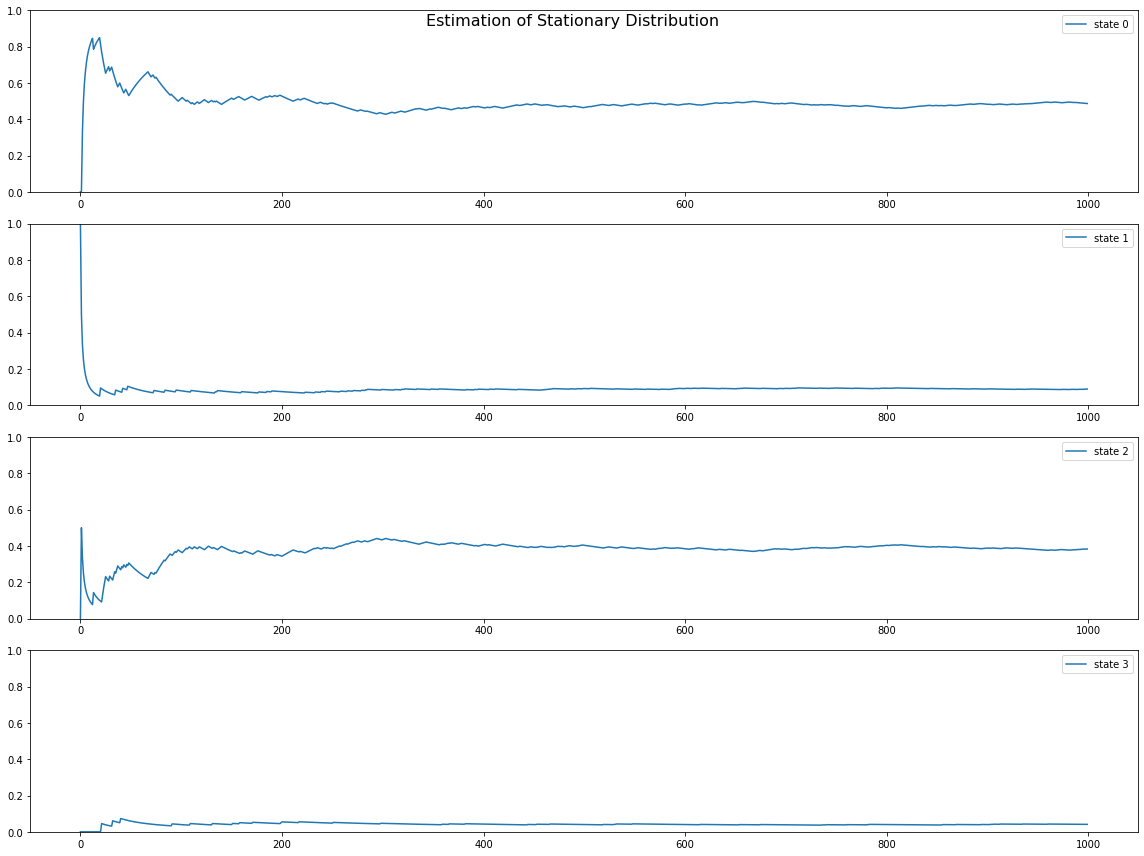

In [3]:
# set parameters ###############################################################
num_steps = 1000
# set parameters ###############################################################

if 1:
    env = TransProb(trans_prob_name='random')
elif 0:
    env = TransProb(trans_prob_name='homogeneous')
elif 1:
    env = TransProb(trans_prob_name='non-homogeneous')
    
transition_probs = env.transition_probs
num_states = env.num_states
initial_distribution = np.ones((num_states,)) / num_states

mc = MarkovChain(transition_probs, initial_distribution, np_seed=1)

visit_log = np.zeros((num_states,num_steps)) 
mc.reset()
visit_log[mc.current_state, 0] = 1.   
for step in range(1, num_steps):
    mc.step()
    visit_log[mc.current_state, step] = 1.

pi = np.cumsum(visit_log, axis=1) / (np.arange(num_steps) + 1).reshape((1,-1)) 
print("Estimation of Stationary Distribution : ", pi[:,-1])

fig = plt.figure(figsize=(16, 12))

# https://matplotlib.org/api/_as_gen/matplotlib.pyplot.subplots_adjust.html
fig.subplots_adjust(hspace=0.1, wspace=0.3)

# https://matplotlib.org/api/_as_gen/matplotlib.pyplot.suptitle.html
fig.suptitle("Estimation of Stationary Distribution", fontsize=16)

for s in range(num_states):
    ax = fig.add_subplot(num_states, 1, s + 1)
    ax.plot(pi[s], label="state {}".format(str(s)))
    ax.legend(loc='upper right')
    ax.set_ylim([0., 1.])
    
plt.tight_layout()
plt.show()